In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip

unzip:  cannot find or open /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip, /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip.zip or /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip.ZIP.


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Student_Dataset/online_education.csv')

In [ ]:
data.head()

,Education Level,Institution Type,Gender,Age,Device,IT Student,Location,Financial Condition,Internet Type,Network Type,Flexibility Level
0,University,Private,Male,23,Tab,No,Town,Mid,Wifi,4G,Moderate
1,University,Private,Female,23,Mobile,No,Town,Mid,Mobile Data,4G,Moderate
2,College,Public,Female,18,Mobile,No,Town,Mid,Wifi,4G,Moderate
3,School,Private,Female,11,Mobile,No,Town,Mid,Mobile Data,4G,Moderate
4,School,Private,Female,18,Mobile,No,Town,Poor,Mobile Data,3G,Low


In [ ]:
data.tail()

,Education Level,Institution Type,Gender,Age,Device,IT Student,Location,Financial Condition,Internet Type,Network Type,Flexibility Level
1200,College,Private,Female,18,Mobile,No,Town,Mid,Wifi,4G,Low
1201,College,Private,Female,18,Mobile,No,Rural,Mid,Wifi,4G,Moderate
1202,School,Private,Male,11,Mobile,No,Town,Mid,Mobile Data,3G,Moderate
1203,College,Private,Female,18,Mobile,No,Rural,Mid,Wifi,4G,Low
1204,School,Private,Female,11,Mobile,No,Town,Poor,Mobile Data,3G,Moderate


In [ ]:
data.shape

(1205, 11)

In [ ]:
data.columns


Index(['Education Level', 'Institution Type', 'Gender', 'Age', 'Device',
       'IT Student', 'Location', 'Financial Condition', 'Internet Type',
       'Network Type', 'Flexibility Level'],
      dtype='object')

In [ ]:
data.duplicated().sum()

980

In [ ]:
data.isnull().sum()

Education Level        0
Institution Type       0
Gender                 0
Age                    0
Device                 0
IT Student             0
Location               0
Financial Condition    0
Internet Type          0
Network Type           0
Flexibility Level      0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Education Level      1205 non-null   object
 1   Institution Type     1205 non-null   object
 2   Gender               1205 non-null   object
 3   Age                  1205 non-null   int64 
 4   Device               1205 non-null   object
 5   IT Student           1205 non-null   object
 6   Location             1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Flexibility Level    1205 non-null   object
dtypes: int64(1), object(10)
memory usage: 103.7+ KB


In [ ]:
data.describe()

,Age
count,1205.000000
mean,17.065560
std,5.830369
min,9.000000
25%,11.000000
50%,18.000000
75%,23.000000
max,27.000000


In [ ]:
data.nunique()


Education Level        3
Institution Type       2
Gender                 2
Age                    6
Device                 3
IT Student             2
Location               2
Financial Condition    3
Internet Type          2
Network Type           3
Flexibility Level      3
dtype: int64

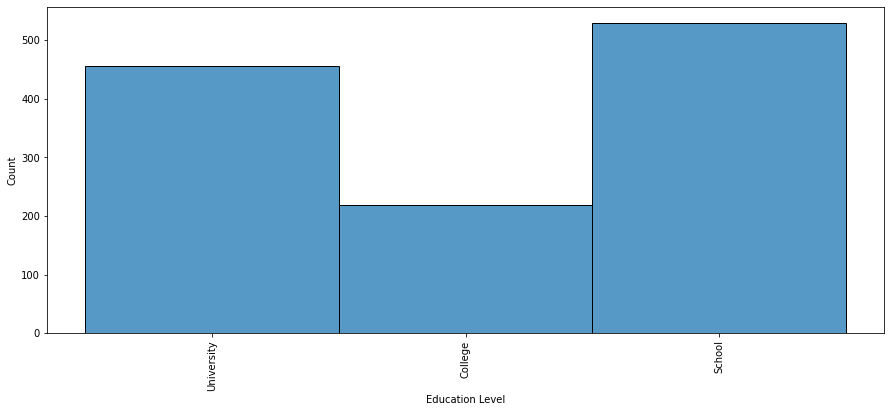

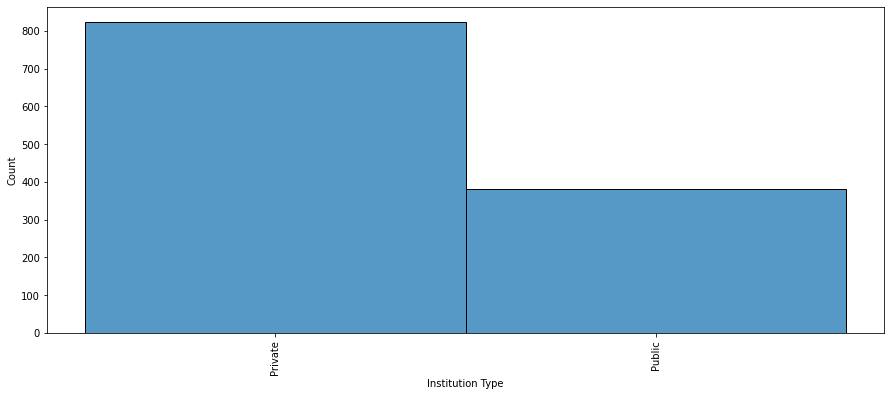

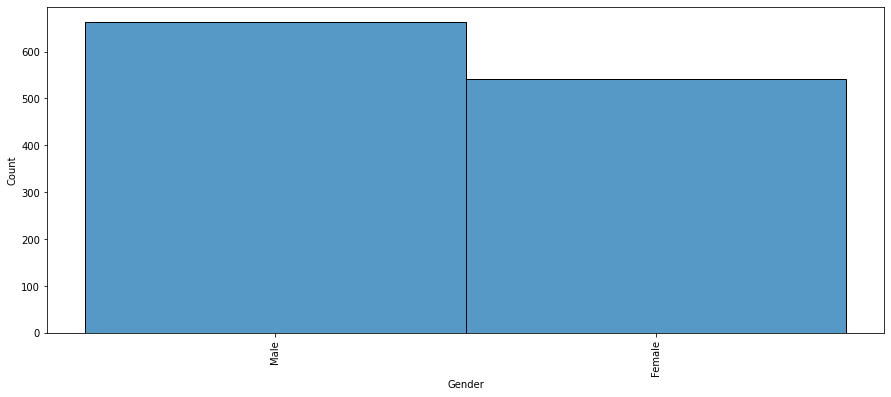

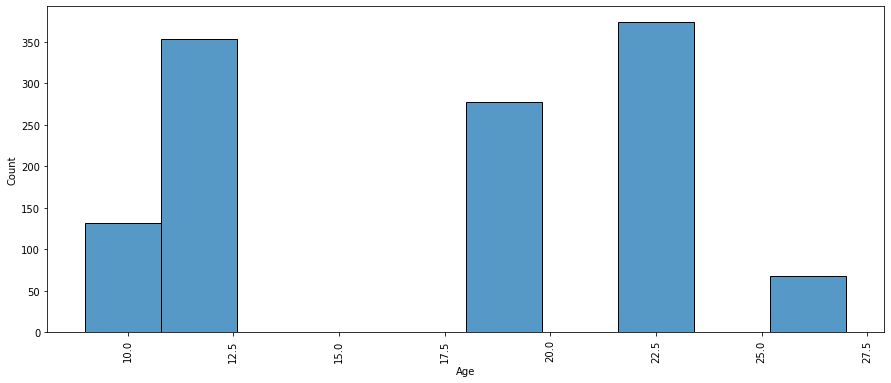

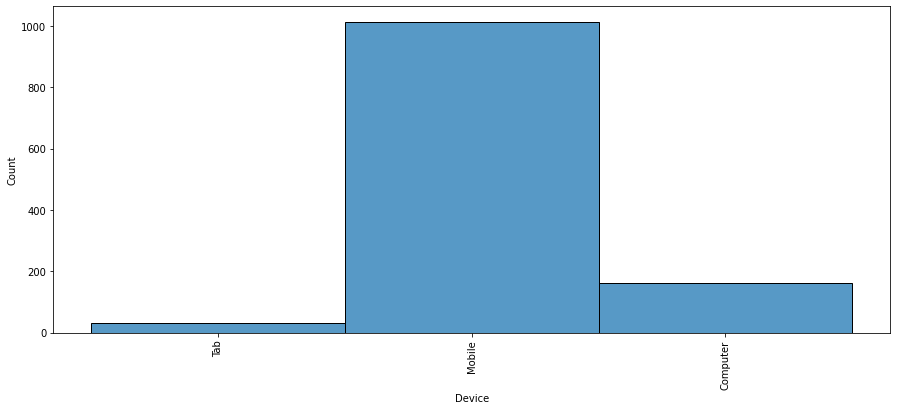

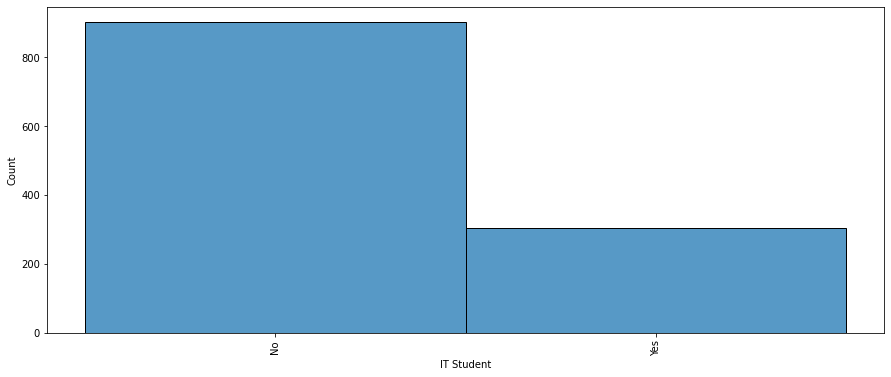

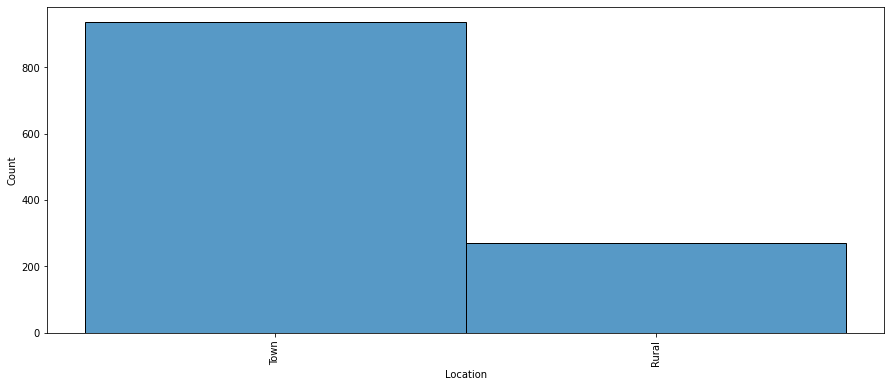

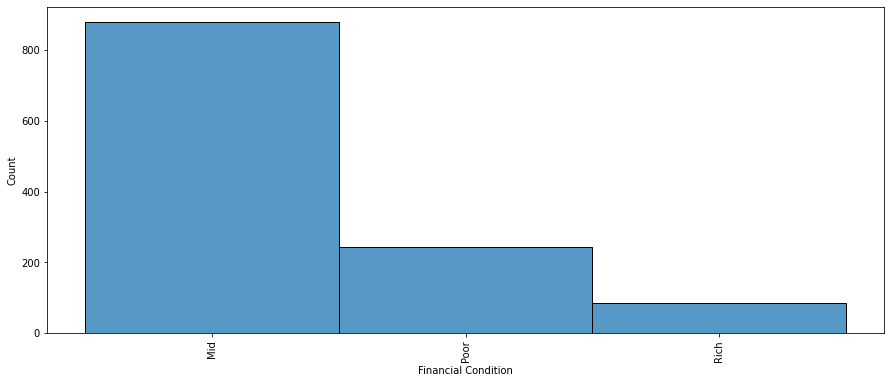

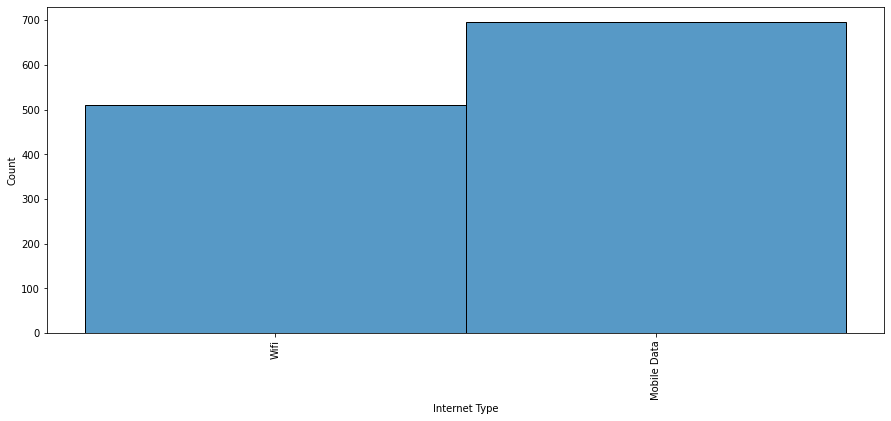

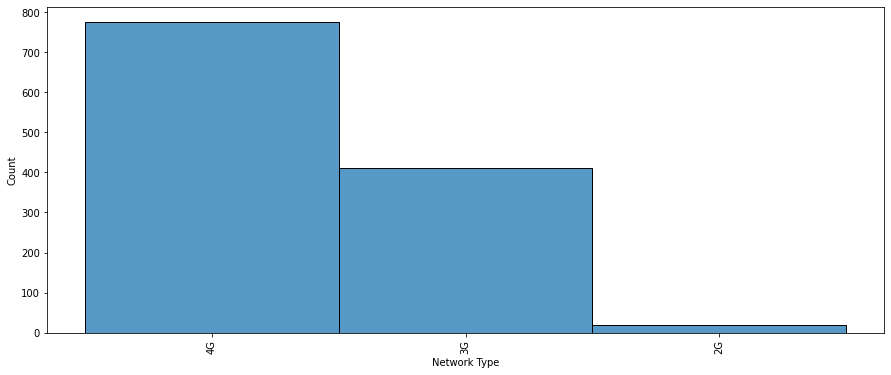

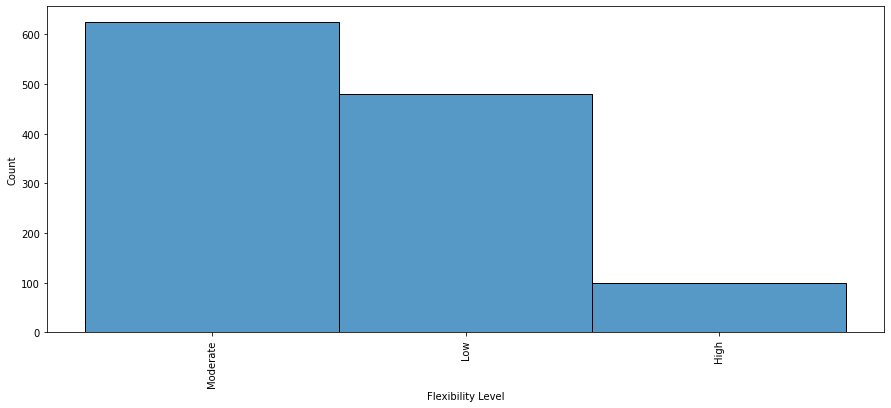

In [ ]:
for i in data.columns:
  plt.figure(figsize=(15,6))
  sns.histplot(data[i], bins=10)
  plt.xticks(rotation = 90)
  plt.show()


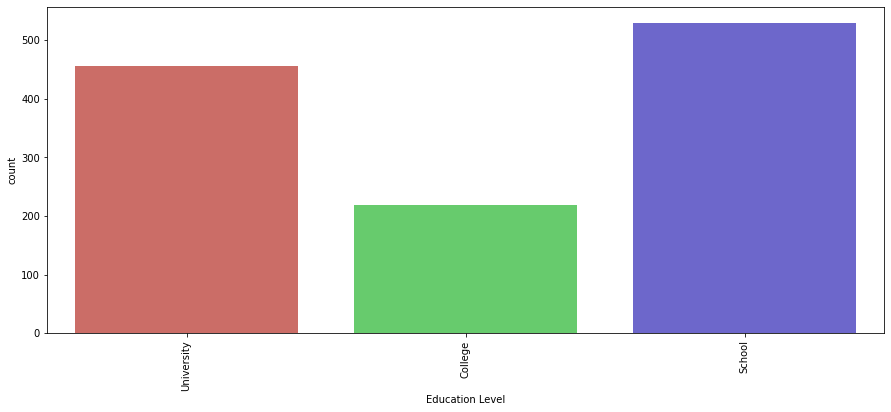

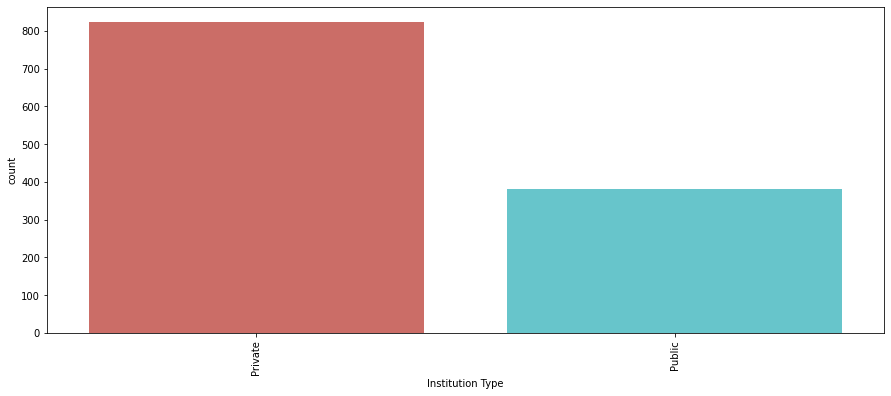

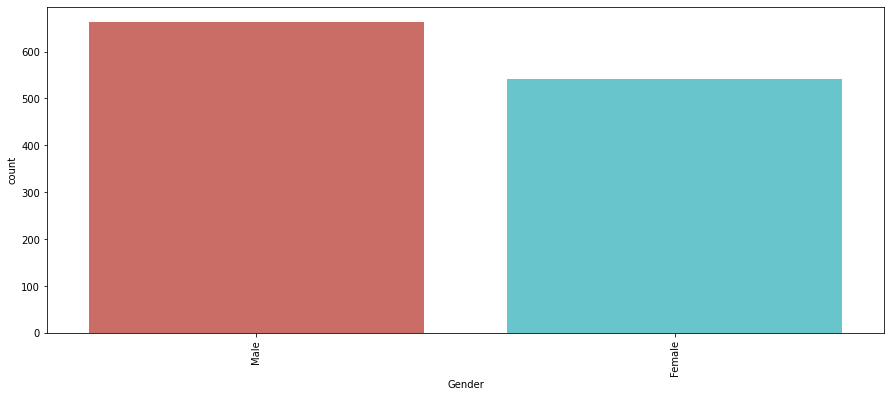

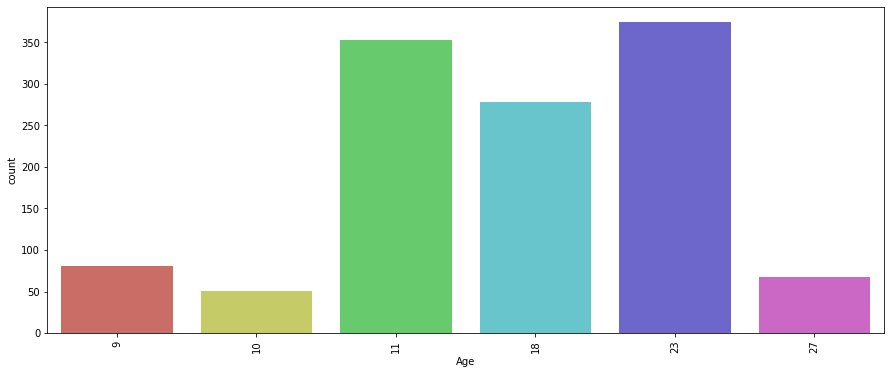

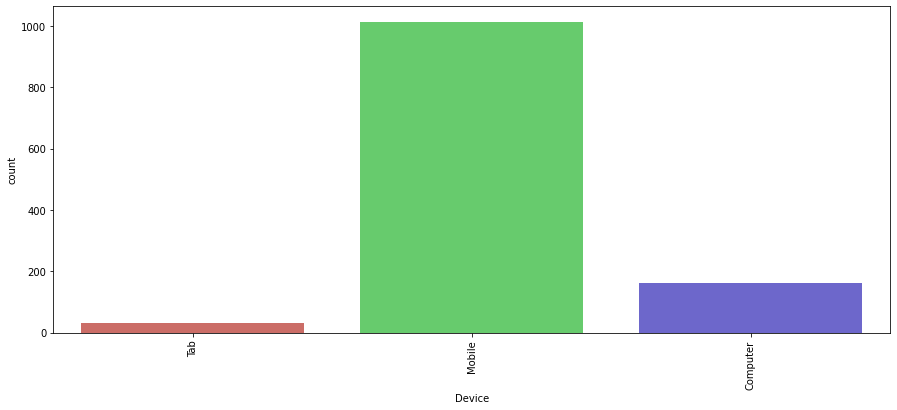

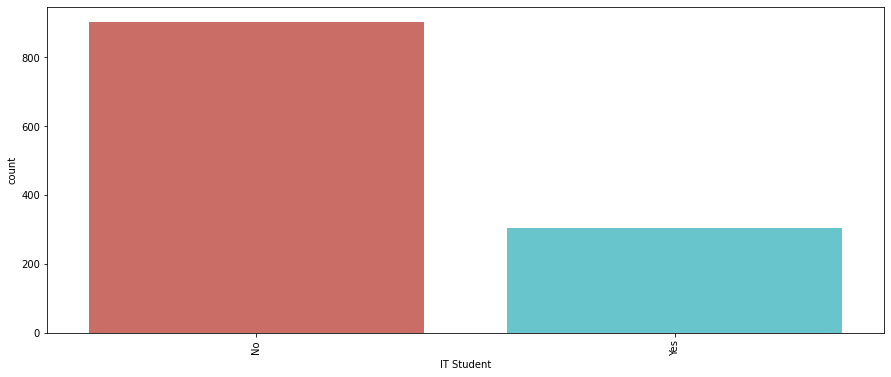

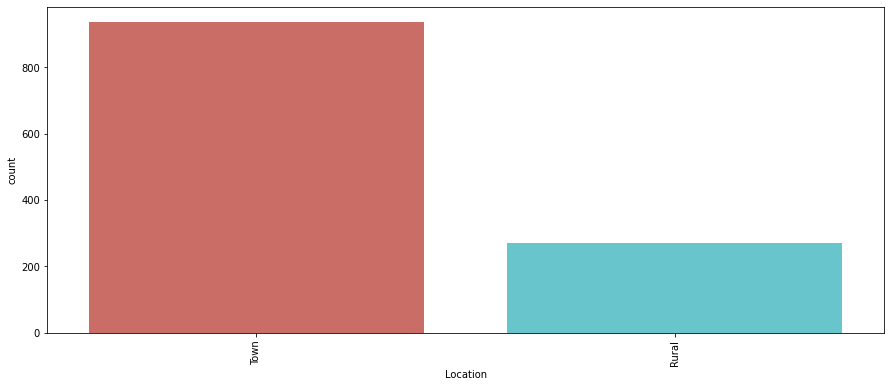

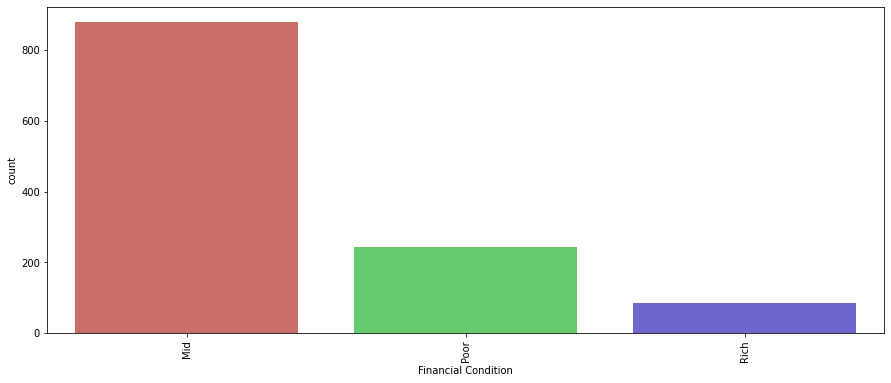

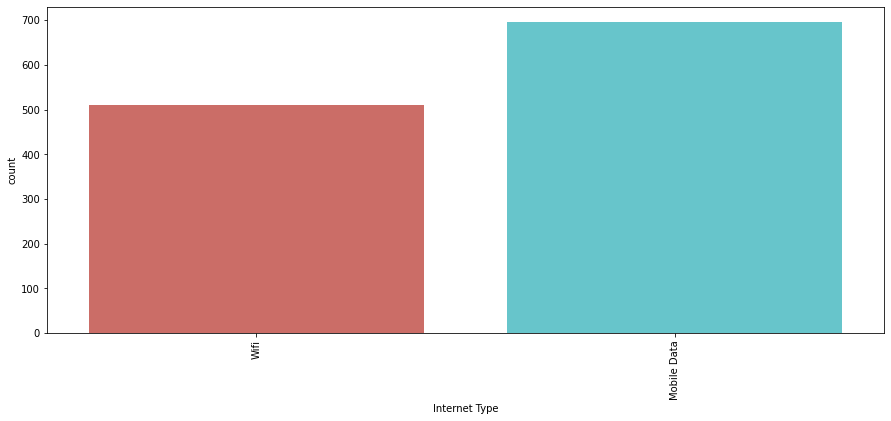

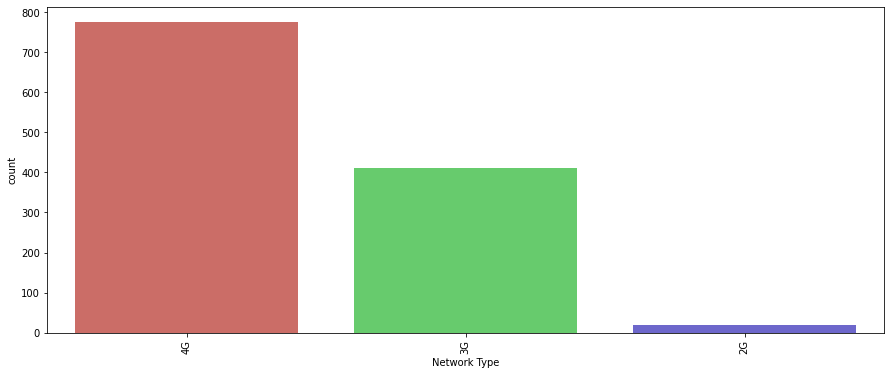

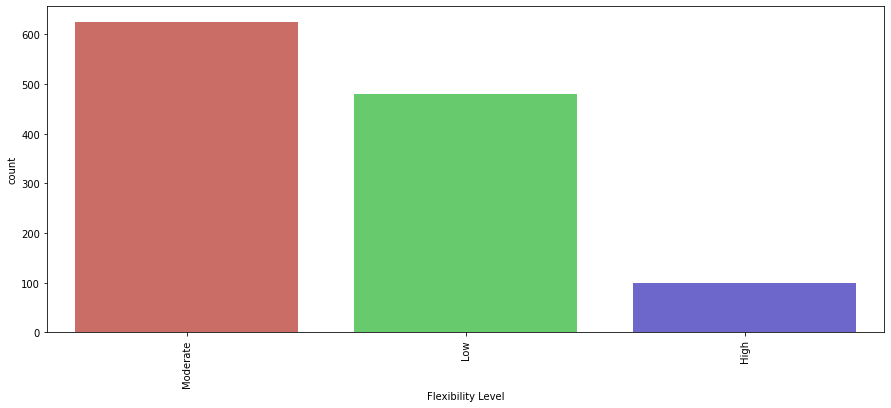

In [ ]:
for i in data.columns:
  plt.figure(figsize=(15,6))
  sns.countplot(data[i], data = data,
  palette='hls')
  plt.xticks(rotation = 90)
  plt.show()


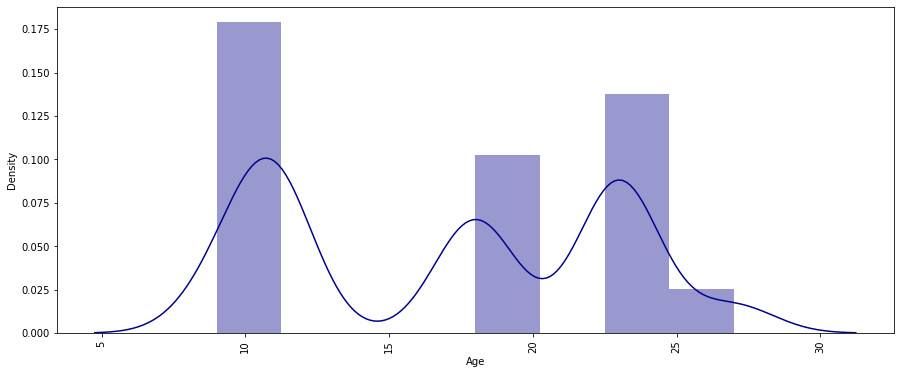

In [ ]:
plt.figure(figsize=(15,6))
sns.distplot(data['Age'],kde = True,color = 'Darkblue')
plt.xticks(rotation = 90)
plt.show()

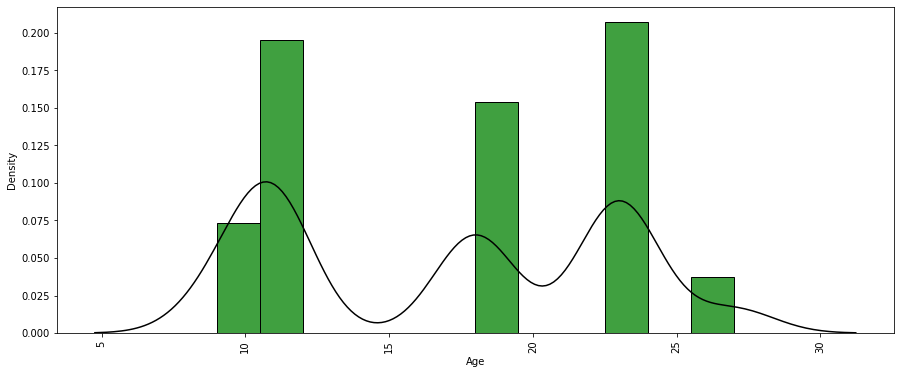

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(data["Age"], stat='density',color='green')
sns.kdeplot(data["Age"], color='black')
plt.xticks(rotation = 90)
plt.show()


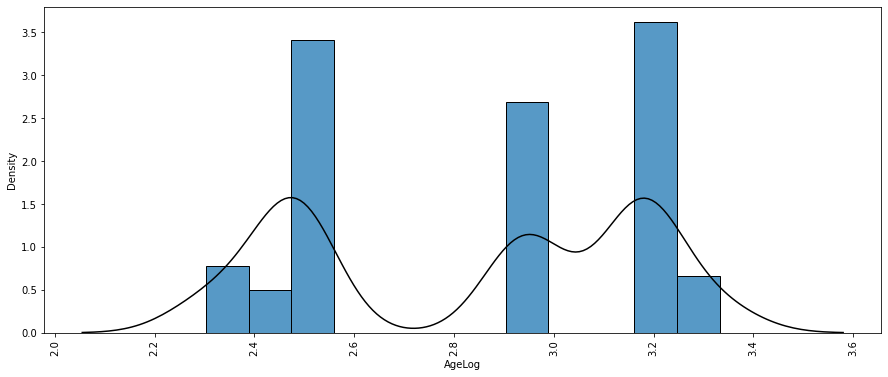

In [ ]:
plt.figure(figsize=(15,6))
data['AgeLog'] = np.log(data['Age']+1)
sns.histplot(data["AgeLog"], stat='density')
sns.kdeplot(data["AgeLog"], color='black')
plt.xticks(rotation = 90)
plt.show()


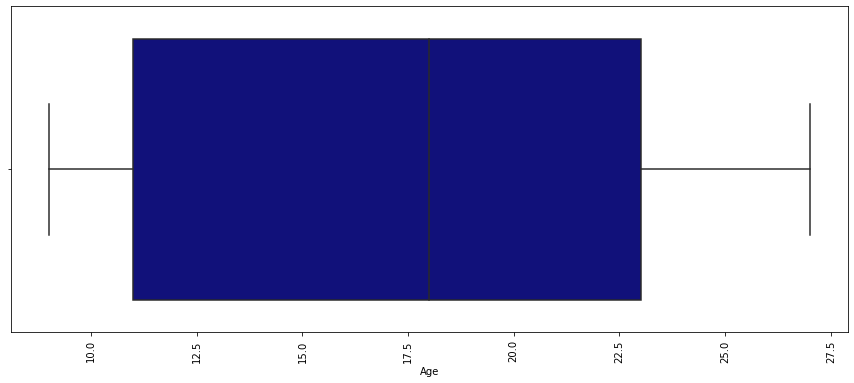

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(data['Age'],color = 'Darkblue')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
FlexibilityLevel = le.fit_transform(data['Flexibility Level'])
data['Flexibility Level'] = FlexibilityLevel


In [ ]:
categorical_features = ['Education Level','Gender','Institution Type',
'Device','IT Student','Location',
'Financial Condition','Internet Type',
'Network Type']

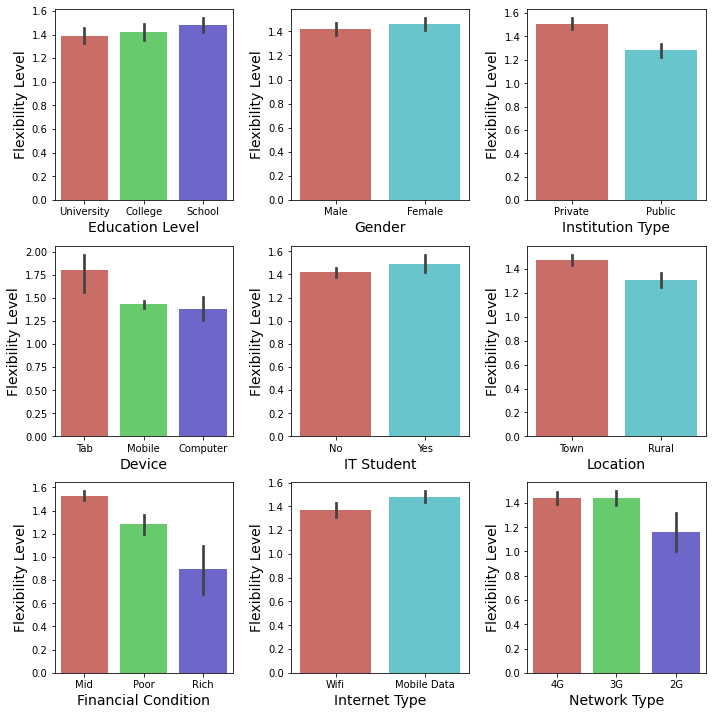

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(10,10))
axes = [ax for axes_row in axes for ax in axes_row]
target = 'Flexibility Level'
for i, c in enumerate(categorical_features):
  sns.barplot(data[c], data[target], ax=axes[i],
  palette = 'hls')
  axes[i].set_ylabel('Flexibility Level', fontsize=14)
  axes[i].set_xlabel(c, fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
EducationLevel= le.fit_transform(data['Education Level'])
Gender = le.fit_transform(data['Gender'])
InstitutionType = le.fit_transform(data['Institution Type'])
Device = le.fit_transform(data['Device'])
ITStudent= le.fit_transform(data['IT Student'])
Location = le.fit_transform(data['Location'])
FinancialCondition = le.fit_transform(data['Financial Condition'])
InternetType = le.fit_transform(data['Internet Type'])
NetworkType = le.fit_transform(data['Network Type'])

In [ ]:
data['Education Level'] = EducationLevel
data['Gender'] = Gender
data['Institution Type'] = InstitutionType
data['Device'] = Device
data['IT Student'] = ITStudent
data['Location'] = Location
data['Financial Condition'] = FinancialCondition
data['Internet Type'] = InternetType
data['Network Type'] = NetworkType


In [ ]:
data.head()


,Education Level,Institution Type,Gender,Age,Device,IT Student,Location,Financial Condition,Internet Type,Network Type,Flexibility Level,AgeLog
0,2,0,1,23,2,0,1,0,1,2,2,3.178054
1,2,0,0,23,1,0,1,0,0,2,2,3.178054
2,0,1,0,18,1,0,1,0,1,2,2,2.944439
3,1,0,0,11,1,0,1,0,0,2,2,2.484907
4,1,0,0,18,1,0,1,1,0,1,1,2.944439


In [ ]:
x = data.drop('Flexibility Level',axis=1)
y = data['Flexibility Level']

In [ ]:
x.shape

(1205, 11)

In [ ]:
y.shape

(1205,)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,
test_size=0.30,
random_state=42)


In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

Training Accuracy : 0.8623962040332147
Testing Accuracy : 0.7624309392265194


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56        39
           1       0.82      0.79      0.80       154
           2       0.76      0.79      0.77       169

    accuracy                           0.76       362
   macro avg       0.71      0.71      0.71       362
weighted avg       0.76      0.76      0.76       362



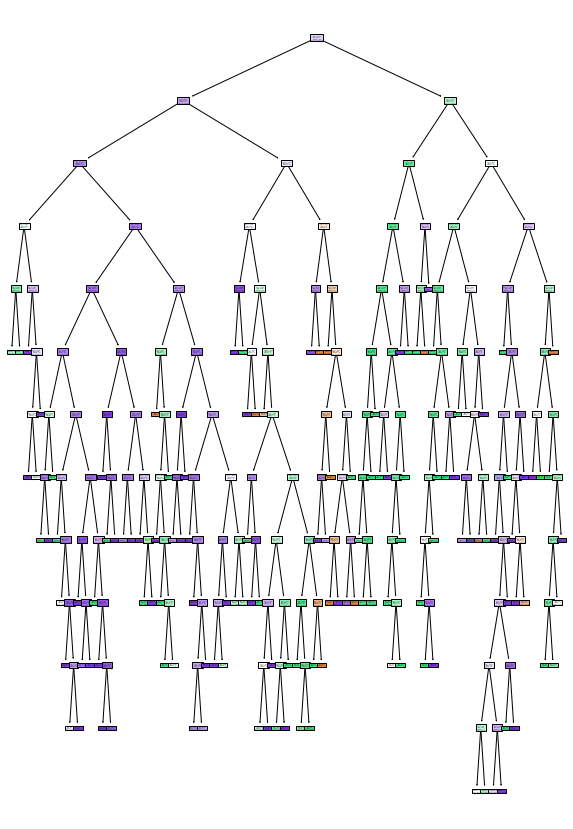

In [ ]:
from sklearn import tree
plt.figure(figsize=(10,15))
tree.plot_tree(model,filled=True)
plt.show()

In [ ]:
model.feature_importances_


array([0.11963532, 0.09626619, 0.1171519 , 0.11083555, 0.0455399 ,
       0.0744752 , 0.0525094 , 0.12108834, 0.06279828, 0.11853719,
       0.08116273])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators= 10,
criterion="entropy")

In [ ]:
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print("Training Accuracy :", classifier.score(X_train, y_train))
print("Testing Accuracy :", classifier.score(X_test, y_test))


Training Accuracy : 0.8612099644128114
Testing Accuracy : 0.8011049723756906


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.56      0.68        39
           1       0.81      0.84      0.82       154
           2       0.79      0.82      0.80       169

    accuracy                           0.80       362
   macro avg       0.81      0.74      0.77       362
weighted avg       0.80      0.80      0.80       362



In [ ]:
classifier.feature_importances_

array([0.08456168, 0.09212969, 0.11513342, 0.11031826, 0.06151548,
       0.05633759, 0.05967863, 0.16680102, 0.08037206, 0.07721925,
       0.09593293])

In [ ]:
grid_param = {
'criterion': ['gini', 'entropy'],
'max_depth' : range(2,32,1),
'min_samples_leaf' : range(1,10,1),
'min_samples_split': range(2,10,1),
'splitter' : ['best', 'random']
}


In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=model,
param_grid=grid_param,
cv=5,
n_jobs =2, verbose=1)


In [ ]:
grid_search.fit(X_train,y_train)


Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [ ]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


In [ ]:
grid_search.best_score_

0.7971329952099183

In [ ]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 25,
min_samples_leaf= 1, min_samples_split= 2,
splitter ='best')
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=25)

In [ ]:
ac2_clf= clf.score(X_test ,y_test)
ac2_clf

0.7983425414364641

Text(0.5, 1.03, 'Confusion Matrix for Decision Tree')

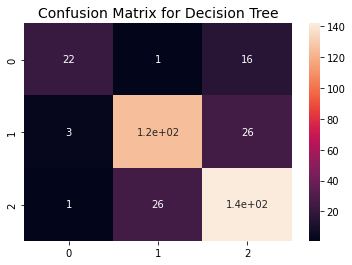

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_clf = clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_clf)
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Decision Tree", fontsize=14,
fontname="DejaVu Sans", y=1.03)


In [ ]:

y_pred_rf = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
ac_rf=accuracy_score(y_test,y_pred)
ac_rf

0.8011049723756906

Text(0.5, 1.03, 'Confusion Matrix for RandomForest Classifier')

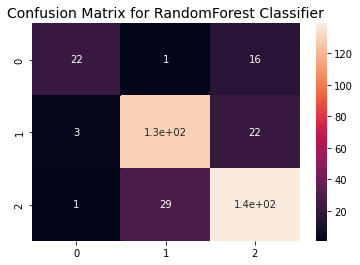

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for RandomForest Classifier",
fontsize=14, fontname="DejaVu Sans", y=1.03)

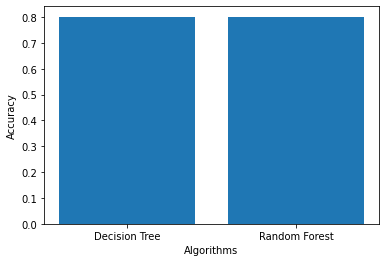

In [ ]:
plt.bar(['Decision Tree','Random Forest'],[ac2_clf,ac_rf])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()